<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/UNT-CSE-SpaceshipTitanic/blob/dev_latifi/Spaceship_Titanic_Latifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages, libraries
import pandas as pd
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from google.colab import drive

In [2]:

### Connect with google drive
def connect_and_fetch_train():

  drive.mount('/content/drive')

  ### Train & Test csv dir

  train_file = "1aFLIETCp08ZRwvYj29MPeHokzltUywhv"
  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  train_dir = f'https://drive.google.com/uc?id={train_file}'
  return train_dir

def connect_and_fetch_test():
  drive.mount('/content/drive')

  ### Train & Test csv dir

  test_file = "1wB9wtBDqedOlLeVfnaMY0b_oTXmu3rg4"


  test_dir = f'https://drive.google.com/uc?id={test_file}'
  return test_dir



In [3]:
df_train = pd.read_csv(connect_and_fetch_train())
df_test = pd.read_csv(connect_and_fetch_test())

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


# Data Visualization

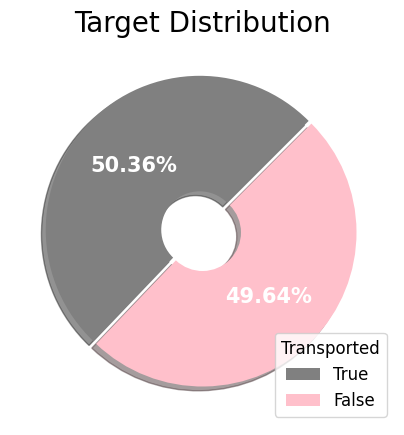

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

labels = df_train["Transported"].value_counts().index
lst = df_train["Transported"].value_counts().to_list()
pie = ax.pie(lst, labels = labels, autopct='%.2f%%', textprops=dict(color="white", fontsize=15, weight="bold"), colors=["grey", "pink"], shadow=True, wedgeprops=dict(width=0.75), startangle=45, explode=(0.025,0))

ax.set_title("Target Distribution", size=20)
ax.legend(title="Transported", title_fontsize=12, loc='best', fontsize=12)
plt.show()

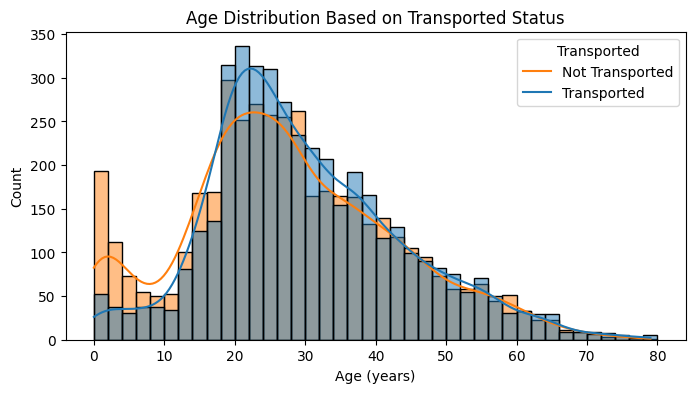

In [6]:
# Figure size
plt.figure(figsize=(8, 4))

# Histogram with custom colors
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=2, kde=True,)

# Plot title and labels
plt.title('Age Distribution Based on Transported Status')
plt.xlabel('Age (years)')

# Legend labels
legend_labels = ['Not Transported', 'Transported']
plt.legend(title='Transported', labels=legend_labels)

# Show the plot
plt.show()

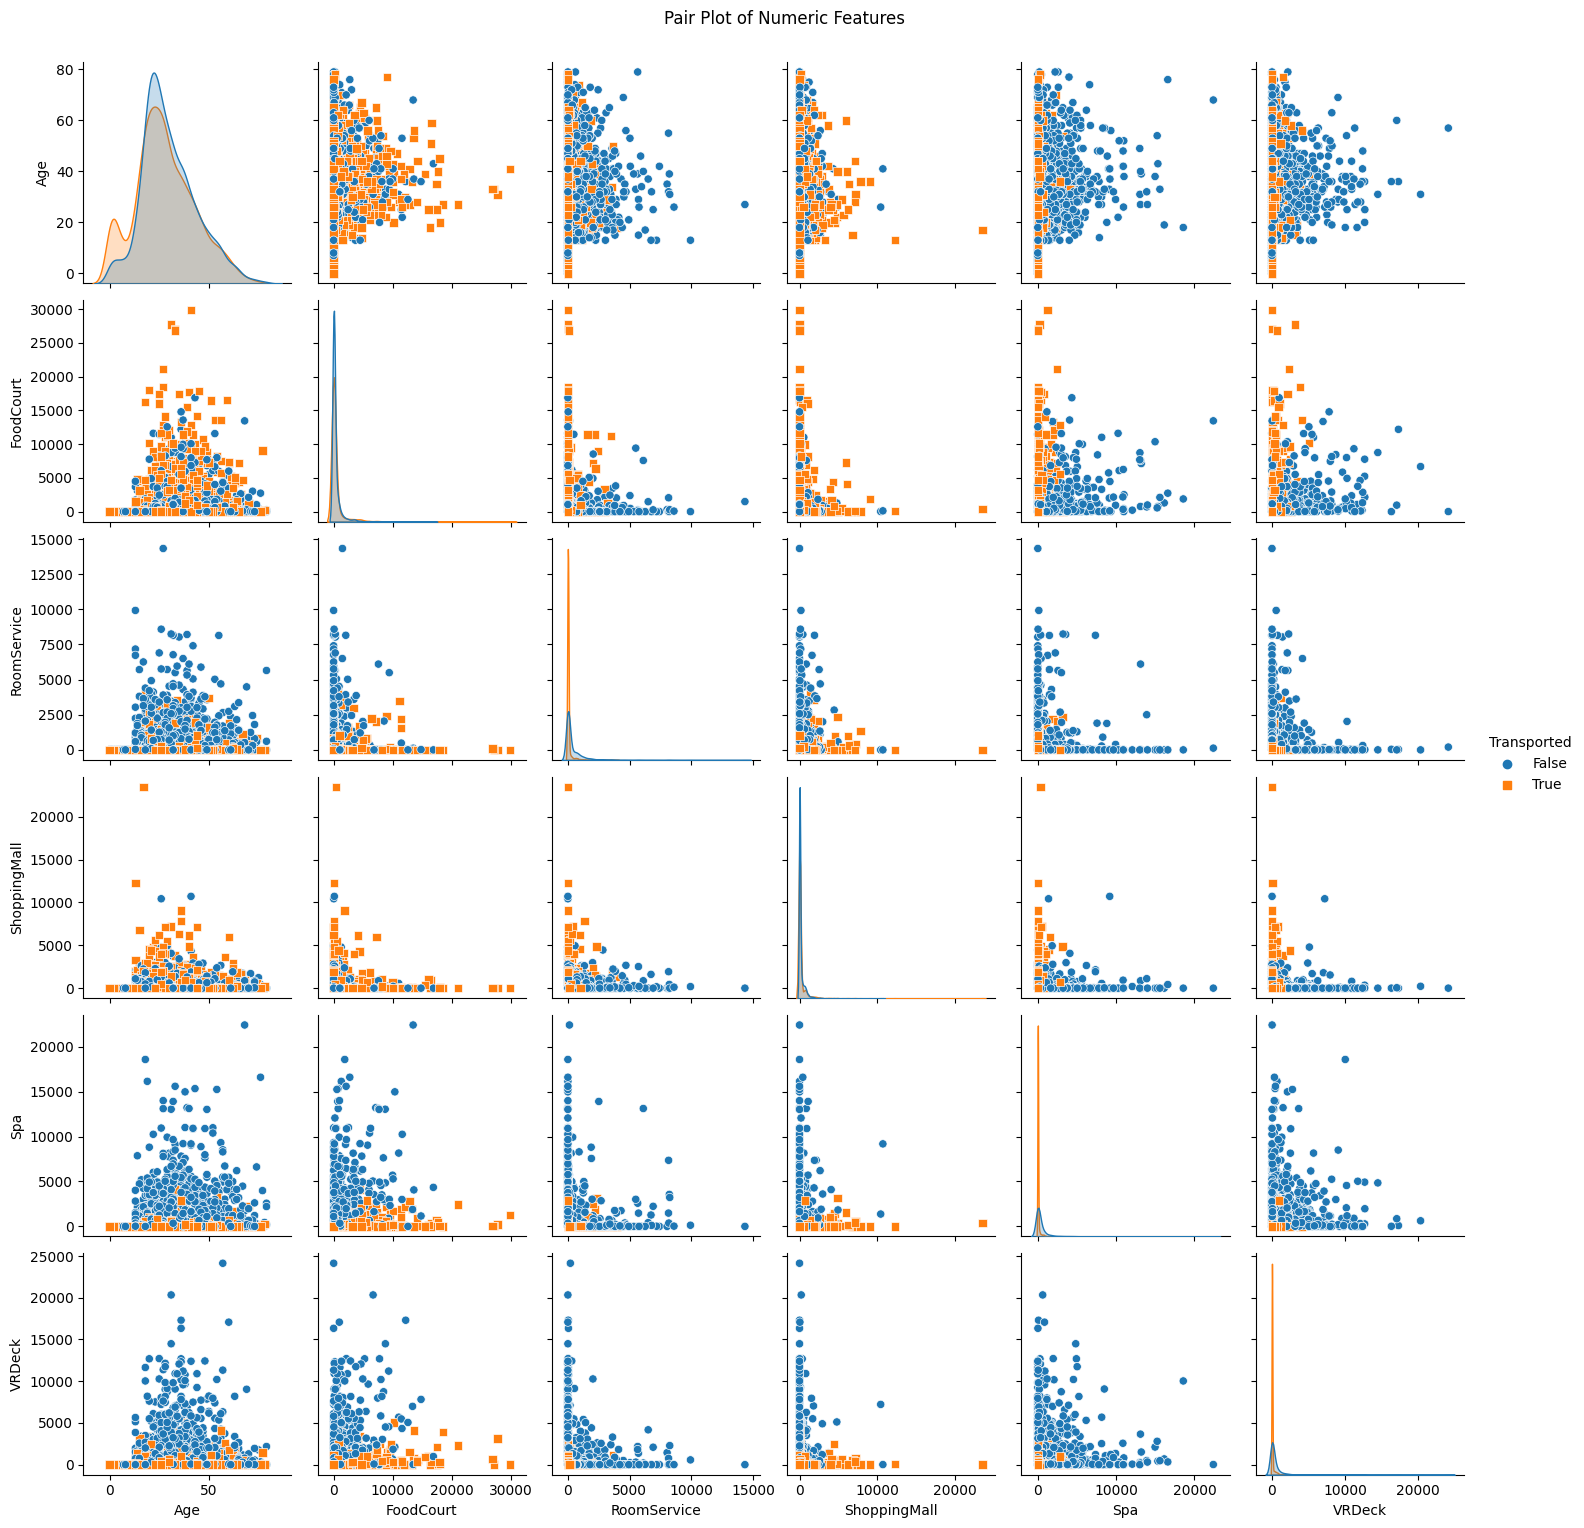

In [7]:
# Selecting relevant features (excluding non-numeric)
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns

# Excluding specific columns
features_to_plot = numeric_features.difference(['PassengerId', 'Transported'])

# pair plot
sns.pairplot(df_train, x_vars=features_to_plot, y_vars=features_to_plot, hue='Transported', markers=["o", "s"])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


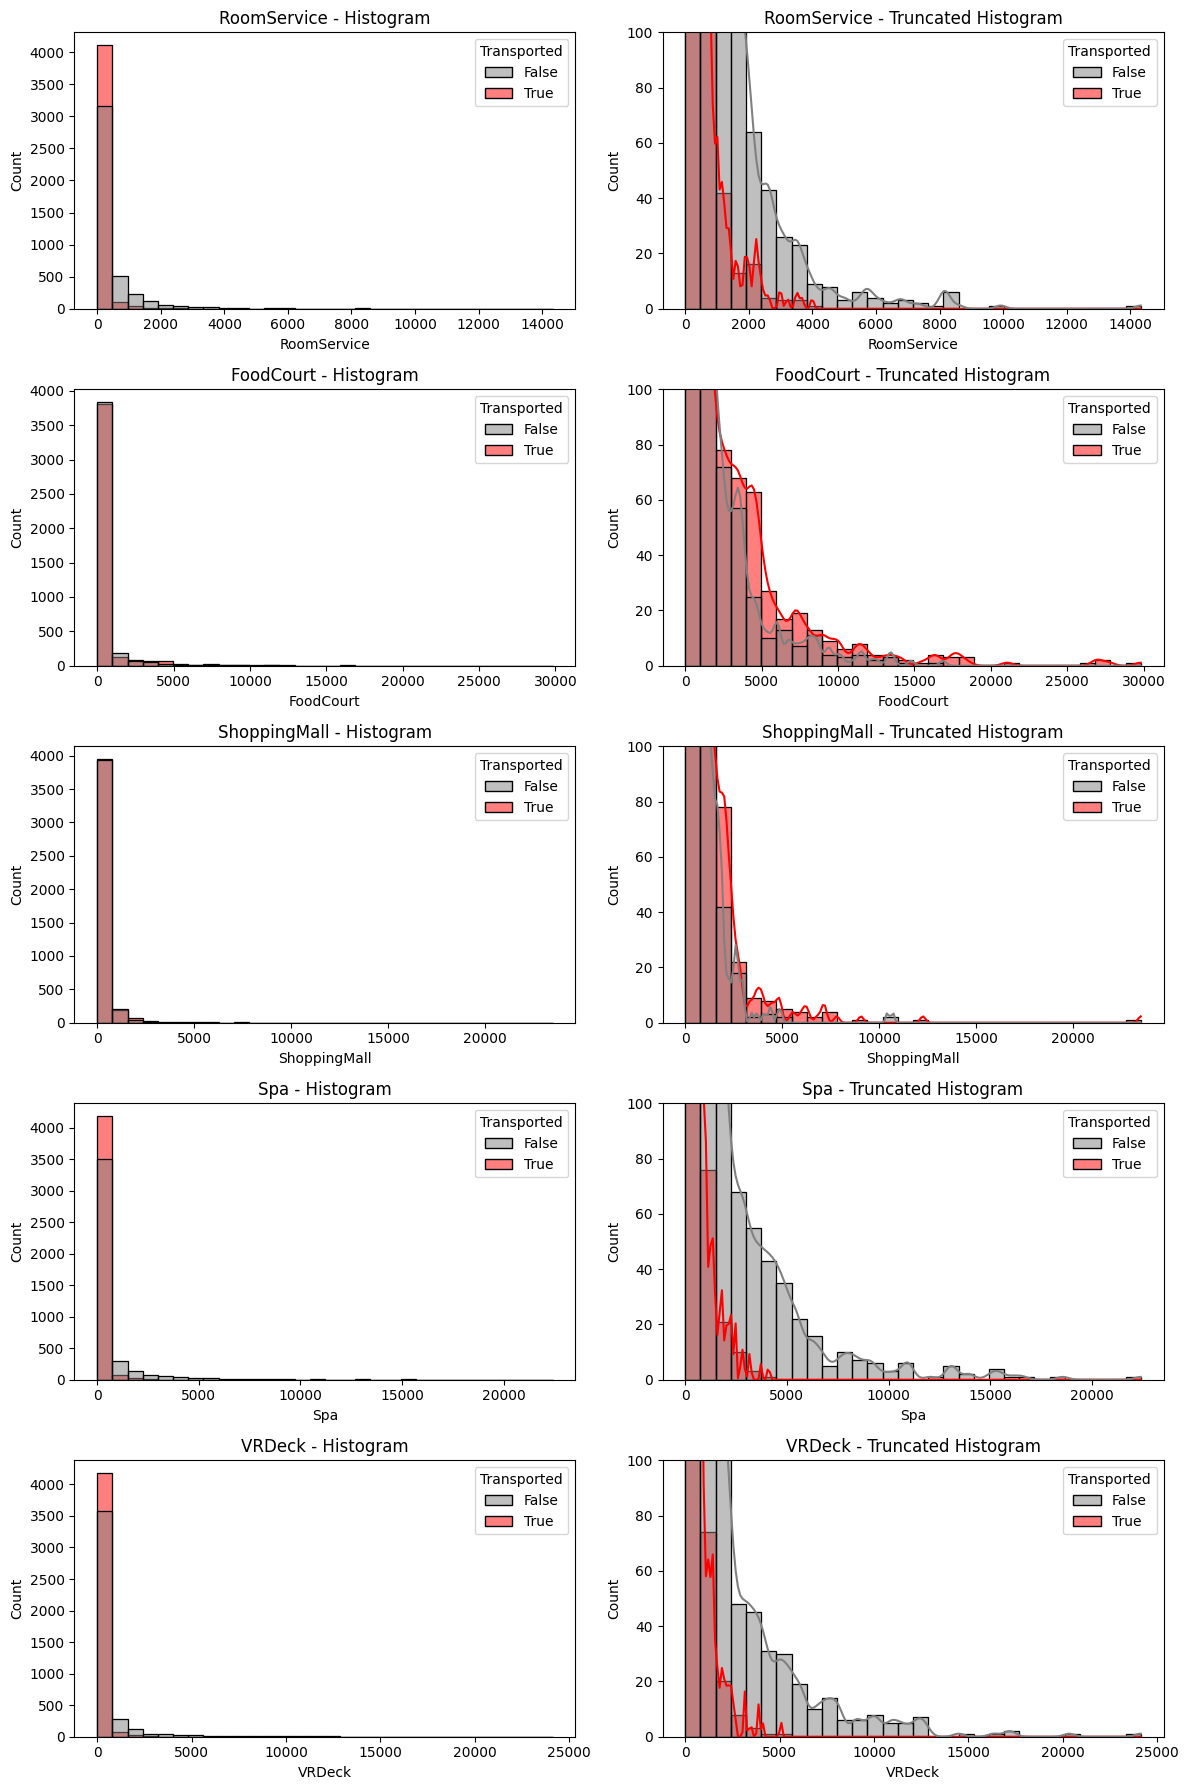

In [8]:
# Expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a plot
plt.figure(figsize=(12, 18))

# Define custom colors
custom_palette = ['grey', 'red']

for i, var_name in enumerate(exp_feats):
    # Create the left plot
    plt.subplot(5, 2, 2 * i + 1)

    # Plot a histogram with custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=False, hue='Transported', palette=custom_palette)

    # Set title
    plt.title(f'{var_name} - Histogram')

    # Create the right plot (truncated)
    plt.subplot(5, 2, 2 * i + 2)

    # Plot a truncated histogram with KDE and custom colors
    sns.histplot(data=df_train, x=var_name, bins=30, kde=True, hue='Transported', palette=custom_palette)

    # Set y-axis limit
    plt.ylim([0, 100])

    # Set title
    plt.title(f'{var_name} - Truncated Histogram')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()


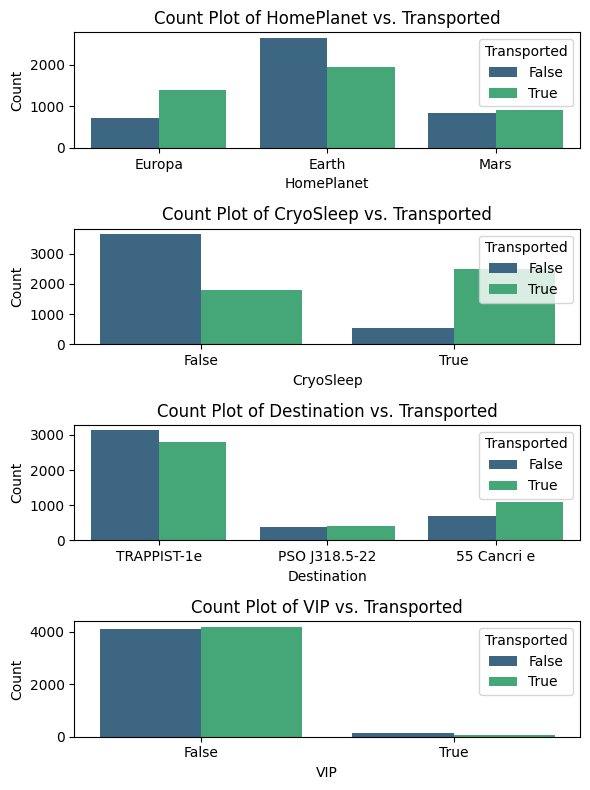

In [11]:
# Categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(6, 8))

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=df_train, x=feature, ax=ax, hue='Transported', palette='viridis')
    ax.set_ylabel('Count')
    ax.set_title(f'Count Plot of {feature} vs. Transported')
# show plot
fig.tight_layout()
plt.show()
